In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import openpathsampling as paths
storage = paths.storage.Storage("mistis.nc", "r")

In [2]:
mistis = storage.networks.load(0)

In [3]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)


True <openpathsampling.ensemble.TISEnsemble object at 0x10eabd310>
True <openpathsampling.ensemble.TISEnsemble object at 0x10eae6150>
True <openpathsampling.ensemble.TISEnsemble object at 0x10eabd090>


In [4]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [5]:
movers = paths.MoveScheme(mistis)
movers.move_summary(storage)

repex ran 16.1838161838% of the cycles with acceptance 61/162 (0.376543209877) 
msouter_shooting ran 4.5954045954% of the cycles with acceptance 33/46 (0.717391304348) 
msouter_repex ran 3.7962037962% of the cycles with acceptance 3/38 (0.0789473684211) 
pathreversal ran 21.8781218781% of the cycles with acceptance 163/219 (0.744292237443) 
shooting ran 49.4505494505% of the cycles with acceptance 352/495 (0.711111111111) 
minus ran 1.998001998% of the cycles with acceptance 17/20 (0.85) 
msouter_pathreversal ran 1.998001998% of the cycles with acceptance 20/20 (1.0) 


In [6]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [7]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})"
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",NaN,0.009235323,0.03074799
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",0.02164797,NaN,NaN


In [8]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

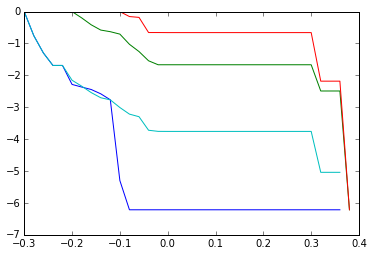

In [13]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))